#EVOLUTIONARY COMPUTING:

---

###R054: Archisha Sinha

---

##Topic: Knapsack Problem with Differential Evolution (DE)

##Aim: Knapsack Problem with Differential Evolution (DE)
- To comprehend the Knapsack Problem.
- To solve the Knapsack Problem using Differential Evolution (DE).
- To comprehend observations for the given approach.


##Theory:

###Knapsack Problem:

The Knapsack Problem involves a situation where a knapsack has a limited capacity, and there are items of different weights and values. The objective is to maximize the value of the items that can be accommodated in the knapsack without exceeding its capacity.

###Differential Evolution (DE):

Differential Evolution (DE) is a population-based stochastic optimization algorithm inspired by the process of natural selection. It operates by maintaining a population of candidate solutions and iteratively improves them.

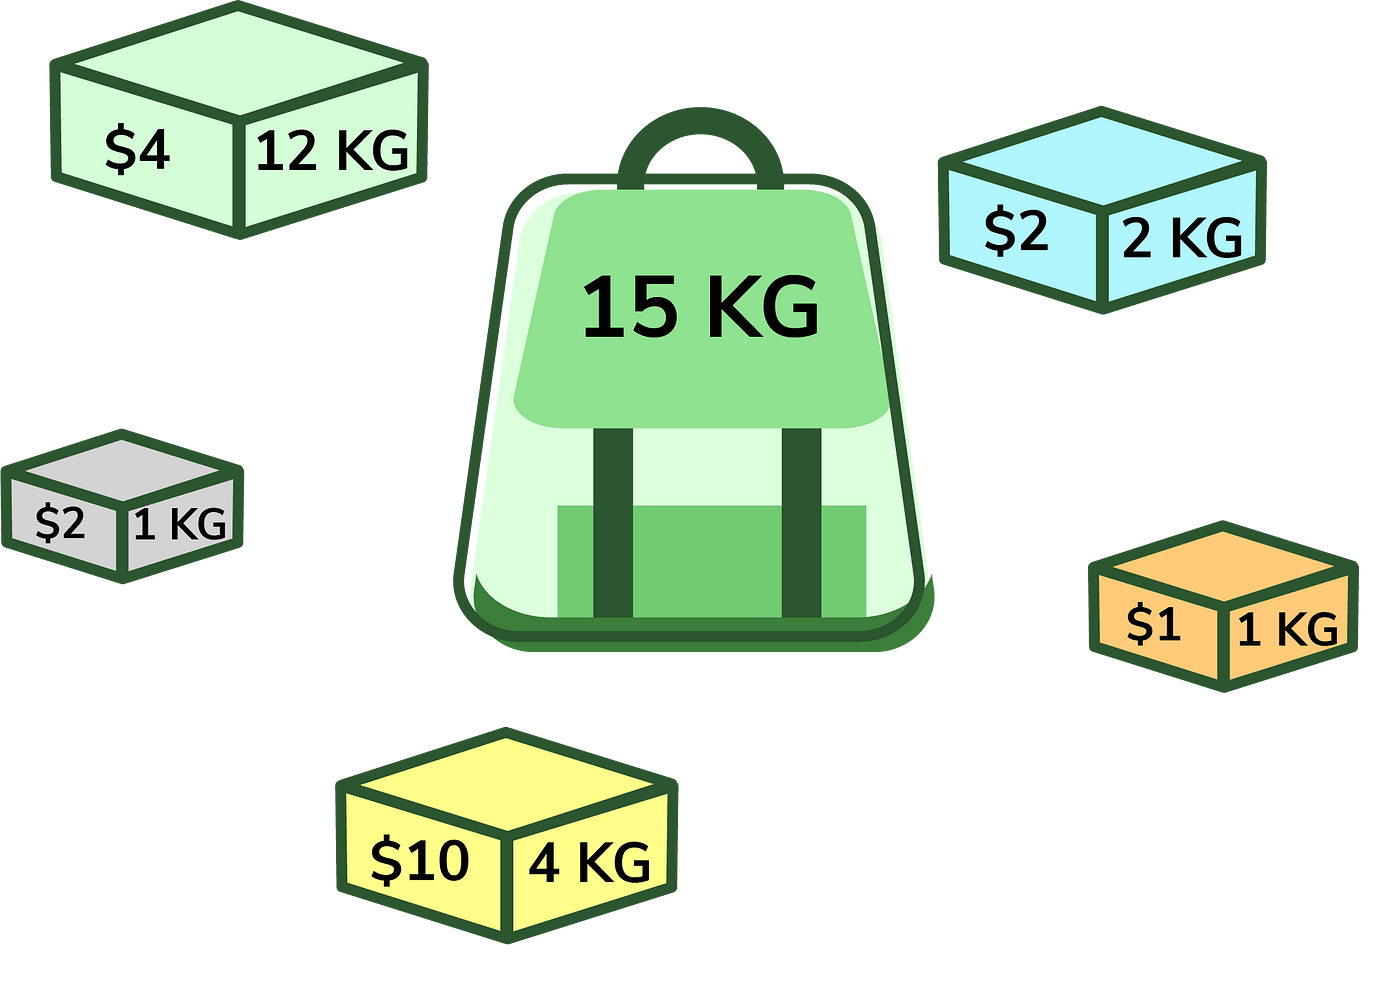

Reference Of the Image: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Falgobox%2Fknapsack-problems-4ccee7c295ea&psig=AOvVaw0E5_y9ytrYJLPhiooONSQO&ust=1715666193314000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCJjXr-T4iYYDFQAAAAAdAAAAABAE

##Task:
1. Represent items as binary strings (1 = include, 0 = exclude).
2. Evaluate fitness based on maximizing total value within weight constraint.
3. Implement mutation by randomly selecting a target vector and adding differences of other vectors scaled by a factor.
4. Use crossover (e.g., DE/rand/1/bin) to combine parent vectors.
5. Select offspring based on fitness for the next generation.
6. Visualize how the algorithm optimizes item selection for maximum value.



In [1]:
import random
import numpy as np

In [2]:
# Knapsack capacity and item weights and values
knapsack_capacity = 50
item_weights = [10, 20, 30, 15, 5]
item_values = [60, 100, 120, 70, 30]
num_items = len(item_weights)

In [3]:
# Differential Evolution parameters
population_size = 20
num_generations = 100
mutation_factor = 0.5
crossover_rate = 0.7

In [4]:
# Initialize population with binary strings representing item selection
population = np.random.randint(2, size=(population_size, num_items))

In [5]:
# Function to calculate fitness based on total value within weight constraint
def calculate_fitness(individual):
    total_weight = np.sum(item_weights * individual)
    total_value = np.sum(item_values * individual)
    if total_weight > knapsack_capacity:
        return 0
    else:
        return total_value

In [6]:
# Main Differential Evolution loop
for generation in range(num_generations):
    new_population = np.zeros((population_size, num_items))

    for i in range(population_size):
        target_vector = population[i]
        a, b, c = random.sample(range(population_size), 3)
        mutant_vector = population[a] + mutation_factor * (population[b] - population[c])
        crossover_mask = np.random.rand(num_items) < crossover_rate
        trial_vector = np.where(crossover_mask, mutant_vector, target_vector)

        if calculate_fitness(trial_vector) > calculate_fitness(target_vector):
            new_population[i] = trial_vector
        else:
            new_population[i] = target_vector

    population = new_population

In [7]:
# Find the best solution after all generations
fitness_scores = [calculate_fitness(individual) for individual in population]
best_solution_index = np.argmax(fitness_scores)
best_solution = population[best_solution_index]
best_fitness = fitness_scores[best_solution_index]

In [8]:
print("Best Solution (Item Selection):", best_solution)
print("Best Fitness (Total Value):", best_fitness)

Best Solution (Item Selection): [ 2.70261817 11.13997388 -2.74316884 -8.66314778  2.37189138]
Best Fitness (Total Value): 411.7106141895056


##Conclusion:

The implemented code showcases how Differential Evolution (DE) can be applied to solve the Knapsack Problem efficiently by optimizing item selection for maximum value within a weight constraint.